<u><b> Step 1: Introduction </b></u><br><br>
What is sentiment analysis? <br><br>
sentiment analysis is a branch of natural language processing and data analysis dedicated to discerning the sentiment conveyed by a sequence of words. <br> Its goal is to comprehend the attitudes, opinions, and emotions expressed in online mentions
sentiment analysis seeks to categorize the emotional tone of a text, determining whether the opinions conveyed in documents, tweets, reviews, or comments<br> are positive, negative, or neutral.

<!-- Run the code below to install libraries -->

<!-- pip install pandas matplotlib seaborn nltk scikit-learn -->



<u><b> step 2: Introduction to vader </b></u><br><br>
VADER is a sentiment analysis tool designed to effectively capture sentiments expressed in social media. It is accessible through the Natural Language <br>Toolkit (NLTK) library for Python.
The tool assesses text, analyzing the sentiment of individual lexical features. It refines sentiment scores by applying <br>rules that take into account syntax and grammatical conventions, ultimately offering an overall sentiment score.<br><br>
We will start off by importing 'nltk'. Upon importing the 'nltk' library, make sure to download the 'vader_lexicon'. Once this step is done, we can proceed to import the 'SentimentIntensityAnalyzer' package from 'nltk.sentiment'.

In [3]:
# pip3 install nltk or pip install nltk
import nltk

# Remember to download vader_lexicon if you havent! Simply uncomment the code below and run it 
# nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

<!-- 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
 -->


<u><b>step 3:</b></u><br><br>
With our setup complete, we're now equipped to get data for our project.<br><br>
<u><b>Data acquisition :</b></u><br><br>
I'll be using a web scraping technique 'beautifulsoap' to help extract the data easily
In this project, i will be using the IMDb movie reviews to gather my data for sentiment analysis.
Lets look at reviews for popular 2021 movie 'spiderman : no way home', link below.<br>
"https://www.imdb.com/title/tt10872600/reviews/?ref_=tt_ov_rt"




In [4]:
import requests
from bs4 import BeautifulSoup

# URL of the IMDb page
my_url = 'https://www.imdb.com/title/tt10872600/reviews/?ref_=tt_ov_rt'

# Fetch the web page content
response = requests.get(my_url)
html_content = response.content

# Create a Beautiful Soup object
soup = BeautifulSoup(html_content, 'html.parser')

# Find the HTML element containing reviews (inspect the HTML source)
reviews_elements = soup.find_all('a', class_='title')  # Adjust according to the actual HTML structure

# Extract and print the text content of each review
for review_element in reviews_elements:

# data cleaning: The Strip() method in Python removes or truncates the given characters from the beginning and the end of the original string. The default behavior of the strip() method is to remove the whitespace from the beginning and at the end of the string.
    review_text = review_element.text.strip()
    print(review_text)
    print('-' * 50)

Loved every second
--------------------------------------------------
Great concept, mediocre execution
--------------------------------------------------
Phenomenal conclusion
--------------------------------------------------
I consider myself to be a big fan of Marvel and definitely of Spider-Man, but something wasn't right about this film
--------------------------------------------------
Nonsense And Nostalgia
--------------------------------------------------
Somehow better than Endgame
--------------------------------------------------
Just Awesome !
--------------------------------------------------
SUPERHERO EXTRAVAGANZA!!!
--------------------------------------------------
Definitely one for the fans...
--------------------------------------------------
A franchise in decline, and this meta nonsense doesn't help
--------------------------------------------------
A MASSIVE treat for every Spidey fan out there.
--------------------------------------------------
Dull, Bland And 

<u><b>step 4:</b></u><br><br>
Next we will create a sentiment analysis classifying each viewers review as either positive, negative, or neutral based on the compound sentiment score.


In [5]:


def scrape_reviews(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Extract reviews from the IMDb page
    viewers_reviews = [review.text for review in soup.find_all('a', {'class': 'title'})]
    return viewers_reviews

def analyze_sentiment(review):
    sid = SentimentIntensityAnalyzer()
    sentiment_score = sid.polarity_scores(review)

    # Classify the sentiment based on the compound score
    if sentiment_score['compound'] >= 0.05:
        return 'Positive statement'
    elif sentiment_score['compound'] <= -0.05:
        return 'Negative statement'
    else:
        return 'Neutral statement'

# IMDb movie reviews URL
imdb_url = 'https://www.imdb.com/title/tt10872600/reviews/?ref_=tt_ov_rt'

# Scrape reviews from the IMDb page
reviews = scrape_reviews(imdb_url)


# Analyze sentiment for each review and print the results
for i, review in enumerate(reviews, start=1):
    sentiment = analyze_sentiment(review)
    print(f'Review #{i}:\n{review}\nSentiment: {sentiment}\n{"-"*50}\n')
     

Review #1:
 Loved every second

Sentiment: Positive statement
--------------------------------------------------

Review #2:
 Great concept, mediocre execution

Sentiment: Positive statement
--------------------------------------------------

Review #3:
 Phenomenal conclusion

Sentiment: Neutral statement
--------------------------------------------------

Review #4:
 I consider myself to be a big fan of Marvel and definitely of Spider-Man, but something wasn't right about this film

Sentiment: Positive statement
--------------------------------------------------

Review #5:
 Nonsense And Nostalgia

Sentiment: Negative statement
--------------------------------------------------

Review #6:
 Somehow better than Endgame

Sentiment: Positive statement
--------------------------------------------------

Review #7:
 Just Awesome !

Sentiment: Positive statement
--------------------------------------------------

Review #8:
 SUPERHERO EXTRAVAGANZA!!!

Sentiment: Neutral statement
----------

<u><b>step 5:</b></u><br><br>
We will Present the outcomes in a simple bar chart format.

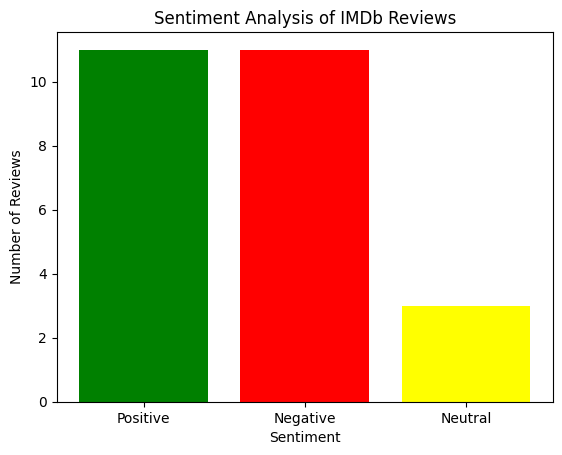

In [6]:
import requests
from bs4 import BeautifulSoup
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

def scrape_reviews(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Extract reviews from the IMDb page
    reviews = [review.text for review in soup.find_all('a', {'class': 'title'})]

    return reviews

def analyze_sentiment(review):
    sid = SentimentIntensityAnalyzer()
    sentiment_score = sid.polarity_scores(review)

    # Classify the sentiment based on the compound score
    if sentiment_score['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# IMDb movie reviews URL
imdb_url = 'https://www.imdb.com/title/tt10872600/reviews/?ref_=tt_ov_rt'

# Scrape reviews from the IMDb page
reviews = scrape_reviews(imdb_url)

# Analyze sentiment for each review and collect the results
sentiments = [analyze_sentiment(review) for review in reviews]

# Count the occurrences of each sentiment
sentiment_counts = {
    'Positive': sentiments.count('Positive'),
    'Negative': sentiments.count('Negative'),
    'Neutral': sentiments.count('Neutral')
}

# Plot the results in a bar chart
labels = list(sentiment_counts.keys())
counts = list(sentiment_counts.values())

plt.bar(labels, counts, color=['green', 'red', 'yellow'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Analysis of IMDb Reviews')
plt.show()

<u><b>step 6: summary</b></u><br><br>
The provided Python code conducts sentiment analysis on IMDb movie reviews using web scraping and Natural Language Toolkit (NLTK) with the VADER sentiment analysis tool. The goal is to extract reviews from the IMDb page of a specific movie (identified by its IMDb ID) and determine whether each review is positive, negative, or neutral.

The script starts by importing necessary libraries: requests for making HTTP requests, BeautifulSoup for parsing HTML content, and SentimentIntensityAnalyzer from NLTK for sentiment analysis. The scrape_reviews function utilizes Beautiful Soup to extract reviews from the IMDb page by locating elements with the specified class. The analyze_sentiment function employs VADER to assign a sentiment score to each review and classifies them based on a compound score threshold.

The main script then applies these functions to the IMDb page, printing each review along with its sentiment analysis result. This approach offers a straightforward sentiment analysis using pre-built tools, making it accessible for individuals seeking a quick sentiment assessment of IMDb movie reviews.